# Challenge Problem 8

In [14]:
import networkx as nx
import matplotlib.pyplot as plot

#### Create the chemical dictionary
each chemical is a key and the value corresponds to every other chemical that CAN be shipped simultaneously with it. It is the exact opposite dictionary described in the problem

In [15]:
chem_dict = {
    1:[3,4,7,8],
    2:[4,6,8],
    3:[1,5,6,8],
    4:[1,2,5],
    5:[3,4],
    6:[2,3,7],
    7:[1,6],
    8:[1,2,3]
            }

#### Reverse dictionary
This returns the exact inverse, it was only really used for testing, using chem_dict on it returns the dictionary of all the chemicals linked to the chemicals they CANNOT be shipped with.

In [16]:
def get_inverse_graph(dol):
    k = nx.complete_graph(9);
    return_dict = nx.to_dict_of_lists(k)
    for key, value in dol.items():
        return_dict[key].remove(0)
        for chemical in value:
            return_dict[key].remove(chemical)
    del return_dict[0]
    print(return_dict)
    return return_dict

## Visual
Here's the chem_dict drawn out, each chemical is connected to other chemicals that can be shipped in the same crate without issue

/home/reese/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/reese/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/reese/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/reese/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

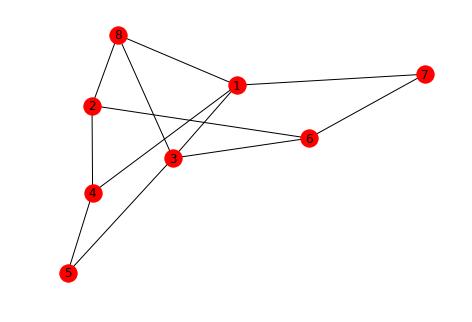

In [17]:
g = nx.from_dict_of_lists(chem_dict)
nx.draw(g,with_labels=True)

plot.show()

## Approach
My approach to solving this problem is to get a list of every single clique, take the biggest one and ship it in a crate, remove it from the graph, and then grab the next biggest clique and repeat until there are no more chemicals lefet to ship

### Getting cliques
Networkx provides a nice little function to get a list of the cliques within a graph, this will be leveraged soon

In [18]:
clique = nx.find_cliques_recursive(g);
print(list(clique))

[[1, 8, 3], [1, 4], [1, 7], [2, 8], [2, 4], [2, 6], [5, 3], [5, 4], [6, 3], [6, 7]]


#### Get em
this leverages the above function to get all the cliques, and reverse their order, so that largest cliques are last. I want largest last because I will be calling pop() on the list, which removes the last item.

In [19]:
def dol_to_clique_list(dol):
    cliques = list(nx.find_cliques(nx.from_dict_of_lists(dol)))
    cliques = list(reversed(cliques))
    return cliques

#### Throw em out
After we've got our chemical clique we need to remove it from the dictionary, this means deleting the key (with all its values) and the key from each value list of all the other chemicals, erase these nodes from existence.

In [20]:
def remove_item_from_dict(item, dct):
    del dct[item]
    for key, values in dct.items():
        if item in values:
            dct[key].remove(item)

#### Recurse
remove the largest clique, add it to our list, and repeat with what remains

In [21]:
def do_solve(dol, return_val):
    if not dol:
        return return_val
    clique_list = dol_to_clique_list(dol)
    popped = clique_list.pop()
    return_val.append(popped)
    for item in popped:
        remove_item_from_dict(item, dol) 
    return do_solve(dol, return_val)

In [22]:
def solve(dol):
    return do_solve(dol.copy(), [])

#### Result
Now we can run the function on our chemical dictionary and get a list of each container and its contents that should be shipped together.

In [23]:
print(solve(chem_dict))

[[1, 8, 3], [2, 4], [5], [6, 7]]


#### For kicks
Here's what would have happened if chemicals that can be paired with eachother couldn't be, and ones that can't be paired together could.

{1: [2, 5, 6], 2: [1, 3, 5, 7, 8], 3: [1, 2, 4, 7, 8], 4: [1, 2, 3, 6, 7, 8], 5: [1, 2, 3, 4, 6, 7, 8], 6: [1, 2, 3, 4, 5, 8], 7: [1, 2, 3, 4, 5, 6, 8], 8: [1, 4, 5, 6, 7]}


/home/reese/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/reese/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/reese/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/reese/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

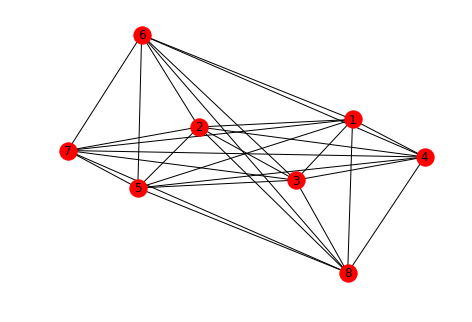

In [24]:
tmp = get_inverse_graph(chem_dict);
g2 = nx.from_dict_of_lists(tmp)
nx.draw(g2,with_labels=True)
plot.show()

In [13]:
solve(tmp)

[[1, 2, 3, 4, 8, 5, 6, 7]]